### 2.) For the decade spanning 2008-2018, what was the worldwide energy consumption by the following sectors - households, industry, transport, agriculture, and commercial / public services?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# set 'verbose' to True to see print statements
verbose = False

### Read Data

In [2]:
# read data into a dataframe
filename = 'total_electricity_2008_2018.csv'
df = pd.read_csv(filename)

### Extract Data

In [3]:
# fetch unique list of commodities
total_coms = df['Commodity - Transaction'].unique()

# filter on 'Consumption' to get relevant groups
mask = [True if com.find('Consumption') > 0 else False for com in total_coms]
coms = total_coms[mask]

# view relevent commodities
if verbose:
    for idx, com in enumerate(coms):
        print('{} : {}'.format(idx, com))

# manually pull and group commodities into specified sectors
households_group = [coms[4]]
transport_group = list(coms[18:22]) + list(coms[23:25])
agriculture_group = [coms[5]]
commercial_public_services_group = [coms[7]]
industry_group = list(coms[0:3])

# store groups in a dict
sectors = {'households': households_group, 
           'transport': transport_group, 
           'agriculture': agriculture_group, 
           'commercial_public_services': commercial_public_services_group, 
           'industry': industry_group
          }

# display contents of each sector
if verbose:
    for sector in sectors:
        print('===================================================')
        print('                    {}                    '.format(sector))
        for agg in sectors[sector]:
            print(agg)


# flatten to list of commodities for easy filtering
coms = [item for i in sectors for item in sectors[i]]

# filter out unused entries from dataframe
df = df[df['Commodity - Transaction'].isin(coms)]
df = df[df['Year'].notna()] # (drop nans)

#### Disclaimer: I am making the assumptions that it is reasonable to aggregate groups of commodities together to form the sectors:

#### Households: Households
#### Transport: Transport; Rail; Pipeline Transport; Transport Equipment; Road; Not Elsewhere Specified (transport)
#### Agriculture: Agriculture, Forest, and Fishing
#### Commercial / Public Services: Commercial and Public Services
#### Industry: Manufacturing, Construction, Non-fuel Industry; Other Manufacturing and Non-fuel Industry; Not Elsewhere Specified (industry)

##### note: if this were a task at work, I would consult with a subject matter expert or spend time researching the topic more in depth before making the decisions on aggregation

### Validate Data

In [4]:
# verify that the data meets some criteria before using it in analysis
def validate_data_task2(df):
    
    # check that the year is correct
    if not (df['Year'].to_numpy() > 2007).all() and (df['Year'].to_numpy() < 2019).all():
        return 'error: not all data from between 2008 and 2018 (inclusive)'
    
    # check that the units are the same
    if len(df['Unit'].unique()) > 1:
        return 'error: cannot add dissimilar units'
    
    # check that each quantity is not negative
    if df['Quantity'].min() < 0:
        return 'error: negative quantity in data'
    
    return 'data good'

# validate data
data_check = validate_data_task2(df)
if data_check != 'data good':
    raise Exception('data validation failed')

### Transform Data

In [5]:
# create new dataframe consisting of total energy usage by sector for each year
years = df['Year'].unique()
usage_df = pd.DataFrame(columns = sectors.keys())


# fill dataframe, summing sectors over each year
for year in years:
    for idx, group in enumerate(sectors):
        usage_df.loc[year, group] = round(sum(df[(df['Year'] == year) & 
                                                 (df['Commodity - Transaction'].isin(sectors[group]))]['Quantity']), 2)

In [6]:
usage_df

,households,transport,agriculture,commercial_public_services,industry
2018.0,6001257.41,991511.09,675963.22,4329228.6,20900782.1
2017.0,5780085.27,936882.95,651549.06,4265571.99,19915046.4
2016.0,5700906.86,920655.86,620399.76,4233395.28,18863001.25
2015.0,5495384.13,885349.31,579902.72,4164842.34,18568455.8
2014.0,5378756.17,881701.51,558760.55,4081491.74,18201652.06
2013.0,5304907.67,867638.83,544948.47,4079399.98,17758469.18
2012.0,5112499.01,835113.19,526212.13,4020035.44,17393008.27
2011.0,5004497.96,813308.56,512656.81,3977785.6,16914619.09
2010.0,4986698.5,767120.2,497433.7,3932924.34,15727208.48
2009.0,4693883.53,724711.28,475983.88,3803877.58,14486668.86


In [7]:
# sum over all years to get decade total
decade_summary = usage_df.sum()

# extract data from series
sectors = list(decade_summary.index)
consumption = np.array(decade_summary)

# sort ascending by kWh, save order
sorted_indices = np.argsort(consumption)
consumption.sort()
sectors = [sectors[i] for i in sorted_indices]

### Analysis and Visualization

Text(0.5, 1.0, '2008-2018 Energy Consumption')

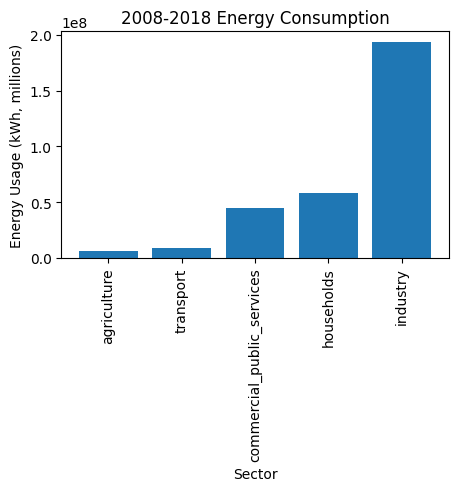

In [8]:
# make plot for energy usage
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 100
plt.bar(np.arange(len(consumption)), consumption)
plt.xticks(ticks = range(0, len(consumption)), labels=sectors, rotation='vertical')
plt.xlabel('Sector')
plt.ylabel('Energy Usage (kWh, millions)')
plt.title('2008-2018 Energy Consumption')

Text(0.5, 1.0, '2008 - 2018 Percent Energy Consumption by Sector')

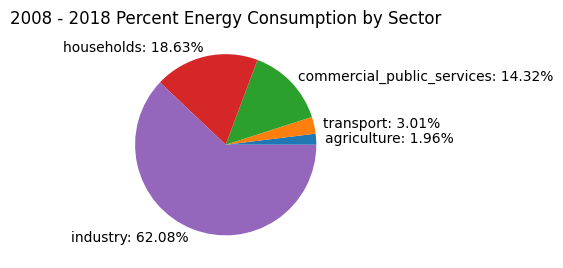

In [9]:
# pie charts are useful for visualizations
percent_consumption = 100 * consumption / sum(consumption)
name_percents = [name + ': ' + str(round(percent_consumption[idx], 2)) + '%' for idx, name in enumerate(sectors)]
plt.pie(consumption, labels = name_percents)
plt.title('2008 - 2018 Percent Energy Consumption by Sector')

### Discussion

As we can see from the above visualizations, the **industry** sector consumed more than all of the remaining sectors combined. Given the sheer size of the **industry** sector's energy consumption, a small optimization will accumulate big savings in operating costs as well as in green house gas emissions. 

The sector with the second largest energy consumption is the **households** sector. Again, a small optimization will accumulate big savings. 

In conclusion, over 80% of the energy consumption between 2008-2018 was in the **industry** and **households** sectors. Designing a product that can help reduce consumption in either sector will likely be a huge success.